# МЧА, осень 2019

## ИПР 6.  Метод конечных элементов для уравнения Пуассона.

*Примечание*. Материалы взяты из курса "Быстрые методы решения уравнений в частных производных", читавшегося группой научных вычислений в Сколковском институте науки и технологий весной 2015. Ниже приводится перевод на русский.

## МКЭ в одномерном случае:

* Рассмотрим область определения $\Omega = [0,1]$
* Сетка (результат триангуляции) ${\mathcal T}$ состоит из сегментов $[x_{i}, x_{i+1}]$ (где $x_0,...,x_N$ означают узлы)
<img src="fig/FEM_mesh_1D.png">

* Идея: материал состоит из базовых строительных блоков: треугольников, сегментов или тетраэдров.

* Возьмем кусочно линейные функции (точнее, кусочно аффинные) относительно $\mathcal T$:
$$
    u_h(x) = \sum_{i=1}^N c_i v_i(x)
$$
<img src="fig/FEM_basis_1D.png">

* Обозначим пространство функций как ${\mathcal P}^1(\mathcal T)$

* Зачастую будем использовать:
$$
\mathcal P^1_0(\mathcal T)
:=
\{u\in\mathcal P^1_0(\mathcal T) : u|_{\Omega} = 0 \}
$$

* Теперь мы можем перейти к дискретизации уравнения...

### Дискретизация уравнения (методом Галеркина):

Для начала нам надо переписать уравнение в вариационной форме.

#### Вариационная форма

* Рассмотрим уравнение Пуассона:
\\[
\begin{align*}
-\Delta u &= f
\\
u|_{\Gamma} &= 0
\end{align*}
\\]

* Умножим уравнение на функцию $v$ (называемую тестовой) такую, что $v|_{\Gamma}=0$ и проинтегрируем:
$$
-\int_{\Omega} (\Delta u) v
=- \int_{\Gamma} \nabla u v \cdot n + \int_{\Omega} \nabla u \cdot \nabla v
=\int_{\Omega} f v
\qquad\forall v
$$

* так как $v=0$ на границе, получаем
$$
\int_{\Omega} \nabla u \cdot \nabla v
=\int_{\Omega} f v
\qquad\forall v
$$
* Это уравнение называется **вариационной формой**

#### Случай граничных условий Неймана или смешанных граничных условий 

* Рассмотрим задачу
$$
\begin{align*}
-\Delta u &= f\qquad\text{для $\Omega$}
\\
u &= 0\qquad\text{для $\Gamma_1$}
\\
u_n &= 0\qquad\text{для $\Gamma_2$}
\end{align*}
$$
где $u_n$ - это производная по нормали $\Gamma_1 \cup\Gamma_2 = \partial\Omega$ (или нормальная производная).

* Необходимо ввести пространство функций $X = \{\text{функция }u : u|_{\Gamma_1}=0 \}$. Тогда для функции $v\in X$ имеем:
$$
-\int_{\Omega} \Delta u v
= - \int_{\Gamma_1} u_n v - \int_{\Gamma_2} u_n v + \int_{\Omega} \nabla u\cdot \nabla v
$$

* Магическим образом, первый интеграл =0 потому что $v=0$ на $\Gamma_1$ и второй интегра =0 потому что $u_n=0$ на $\Gamma_2$.

* **Получаем ту же вариационную задачу**, но с другим пространством функций

### Продолжим рассмотрения метода

* Обозначим $A(u,v) = \int_{\Omega} \nabla u\cdot\nabla v$ и $F(v) := \int_\Omega f v$.

* Получаем дискретные уравния:
\\[
A(u_h, v_h) = F(v_h)
\qquad \forall v_h\in \mathcal P^1_0(\mathcal T)
\\]
(И готово!)

* Чтобы имплементировать метод, нам нужно
$$
A(u_h, v_\ell) = F(v_\ell),
\qquad \ell=1,...,N-1
$$
(таким образом, в качестве тестовых функций достаточно использовать только базисные функции)

* Делаем подстановку $u_h = \sum_{k=1}^{N-1} c_k v_k$:
$$
\sum_{k=1}^{N-1} c_k A(v_k, v_\ell) = F(v_\ell) \qquad \ell=1,\ldots,N-1,
$$

* Следовательно, $A(v_k, v_\ell)$ есть элементы матрицы (называемую матрицей жесткости, **stiffness matrix**), и $F(v_\ell)$ есть компоненты вектора в правой части матричного уравнения.

* Таким образом, метод конечных элементов аналогичен методу Галеркина из ИРЛ 1.

* Остается только решить СЛАУ...

## МКЭ в 2D

* В двумерном случае сетка (или меш) состоит из треугольников
<img width="33%" src="fig/FEM_mesh_example.jpg">

    - Обычно, описывается 3 массивами:

    <tt>узлы:</tt> <br>
    $x_1$, $y_1$ <br>
    $x_2$, $y_2$ <br>
    ... <br>
    $x_N$, $y_N$ <br>
    (т.е., координаты первого узла $(x_1, y_1)$, и.т.д.)

    <tt>треугольники:</tt> <br>
    $n_1$, $n_2$, $n_3$ <br>
    $m_1$, $m_2$, $m_3$ <br>
    ... <br>
    (т.е., узлы $n_1$, $n_2$, $n_3$ являются вершинами первого треугольника, и.т.д.)

    <tt>грани:</tt> <br>
    $n_1$, $n_2$
    ... <br>
    (т.е., отрезок $n_1$, $n_2$ является первой гранью **границы области**, и.т.д. )

* Базисные функции имеют вид:

<img src="fig/FEM_basis_2D.png">  

### Сборка матрицы жесткости

Классический подход:

* Заметим, что $\nabla v_k$ является кусочно-линейной константой:
$$
A_{k,\ell}
= \int_{\Omega} \nabla v_k \nabla v_\ell
= \sum_{T\in\mathcal T} |T| (\nabla v_k|_T) (\nabla v_\ell|_T),
$$
где $|T|$ есть площадь (в общем случае, мера объема в n-мерном пространстве) $T$

* Тогда алгоритм имеет вид:
```
for k = 1 to n
  for l = 1 to n
    for all T
      if(k and l are nodes of T)
      // otherwise the integral is zero
        A(k,l) += |T|
           *(\nabla v_k|_T)
           *(\nabla v_l|_T)
```

* Обычно, циклы алгоритма меняют местами:
```
for all T
    for k, vertices of T
        for l, vertices of T
            A(k,l) += <<as before>>
```

* Преимущество: можно итерировать только по трем вершинам каждого треугольника
* Осталось только рассмотреть геометрию одного треугольника

<img src="fig/FEM_triangle.png">

* Имеем
$$
2 |T| = \det \left(
\begin{array}{cc}
x _2 - x _1 & y _2 - y _1 \\
x _3 - x _1 & y _3 - y _1 \\
\end{array}
\right)
$$
Пусть $n_1$, $n_2$, $n_3$ являются вершинами $T$. Обозначим $\eta_i := v_{n_i}$.
Легко показать:
$$
\nabla \eta _j = \frac{1}{2|T|}
\left(
\begin{array}{cc}
y _{j+1} - y _{j+2} \\
x _{j+2} - x _{j+1} \\
\end{array}
\right)
$$
Подразумевается, что $(x_4,y_4) = (x_1,y_1)$, $(x_5,y_5) = (x_2,y_2)$

* Можно показать, что оценкой матрицы $M_{j,k} = |T| (\nabla \eta_j)\cdot(\nabla \eta_k)$  является:
$$
M = \frac{|T|}{2} G G^T
\qquad\text{где}\qquad
G =
\left(
\begin{array}{ccc}
1 & 1 & 1 \\
x _1 & x _2 & x _3 \\
y _1 & y _2 & y _3
\end{array}
\right)^{-1}
\left(
\begin{array}{ccc}
0 & 0 \\
1 & 0 \\
0 & 1
\end{array}
\right)
$$

* Тогда псевдокод может быть переписан:
```
for all T
    calculate M
    for k=1..3
        for l=1..3
            A(triangles(k),triangles(l)) += M(k,l)
```

* Больше деталей <a href="http://www2.mathematik.hu-berlin.de/~cc/cc_homepage/download/1999-AJ_CC_FS-50_Lines_of_Matlab.pdf">Remarks around 50 lines of Matlab: short finite element
implementation</a>

### Сборка правой части (силы)

* Чтобы оценить силы и избежать точного интегрирования:
$$
\int_T f \eta_i
$$
можно приблизить
$$
\int_T f \eta_i \approx f(x_S, y_S) \int_\Omega \eta_i,
$$
где $(x_S,y_S)$ означает барицентр (или центр масс) треугольника.
Псевдокод для двумерного случая:
```
for all T
  calculate f(xS, yS)
  for k=1..3
    f(triangles(k)) += 1/3 * area(T) * f(xS, yS)
```

### Граничные условия

* Необходимо заполнить только "нужные" столбцы и строки матрицы жесткости, соответсвтующие "свободным узлам".

* **Свободные узлы** -- узлы не лежащие на границе $\Gamma_1$ для задачи
$$
\begin{align*}
-\Delta u &= 0\qquad\text{для $\Omega$}
\\
u &= 0\qquad\text{для $\Gamma_1$}
\\
u_n &= 0\qquad\text{для $\Gamma_2$}
\end{align*}
$$

* Тогда алгоритм имеем вид:
```
A = zero matrix for all nodes
for all T
    <<SAME>>
убрать столбцы и строки матрицы А, не соответствующие свободным узлам
```

* Алтернативно, можно **заменить** соответствующие строки и столбцы на:
$$
\begin{pmatrix}
\cdot & 0 & \cdot & \cdot \\
0 & 1 & 0 & 0\\
\cdot & 0 & \cdot & \cdot \\
\cdot & 0 & \cdot & \cdot \\
\end{pmatrix}
$$


## Преимущества/Недостатки метода конечных элементов

* Хорошо подходит для простой физики, сопромата.
* Хорошо соответствует принципам сохранения энергии, и другим косервативным принципам

Но...

* Не просто добиться стабильности для задач газо- и гидродинамики.
* иногда не монотонный.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import meshpy.triangle as triangle
import scipy.sparse as sps
from scipy.sparse.linalg import spsolve
from scipy.interpolate import griddata

# Задача
Рассмотрим уравнение Пуассона
$$
\begin{align*}
-\Delta u &= 1\qquad\text{on $\Omega$}
\\
u &= 0\qquad\text{on $\Gamma$}
\end{align*}
$$
где $\Omega = B_1(0,0)\setminus B_{0.3}(0.7,0)$, $B_r(x,y)$ есть круг радиуса $r$ с центром в $(x,y)$. Данное уравненение описывает распределение потока жидкости в трубе под давлением и является частью математической модели добычи нефти.

Задача: посчитать $\int_{\Omega} u$ используя метод конечных элементов.

Большинство генераторов сеток не смогу построить сетку на данной области, поэтому рассмотрите регионы $\Omega_1 = B_1(0,0)\setminus B_{0.3}(0.7-2\epsilon,0)$ и $\Omega_2 = B_1(0,0)\setminus B_{0.3}(0.7-\epsilon,0)$ и покажите что полученные решения (или интегралы решений) близки друг к другу для малых $\epsilon$.

## Шаг 1. Постройте сеть.

Можно сделать либо с помощью MeshPy, либо загрузив данные [файлы](https://github.com/oseledets/fastpde/tree/master/Mesh_guide).

Инструкция к MeshPy и функции, которые читают подготовленный файл сетки можно найти [тут](http://nbviewer.ipython.org/github/oseledets/fastpde/blob/master/Mesh_guide/Mesh.ipynb).

#### Reading Mesh from file

In [2]:
def read_dat(filename):
    if not isinstance(filename, str):
        raise ValueError(f'{filename} is not str')
    with open(filename) as f:
        points = []
        n_points = int(f.readline())
        for i in range(n_points):
            points.append(list(map(float, f.readline().split())))
        n_tris = int(f.readline())
        tris = []
        for i in range(n_tris):
            tris.append(list(map(int, f.readline().split())))
        facets = []
        n_facets = int(f.readline())
        for i in range(n_facets):
            facets.append(list(map(int, f.readline().split())))

        return np.array(points), np.array(tris), np.array(facets)

#### Writing Mesh to file

In [3]:
def write_dat(mesh, filename):
    if not isinstance(filename, str):
        raise ValueError(f'{filename} is not str')
    with open(filename, 'w') as f:
        mesh_points = np.array(mesh.points)
        mesh_tris = np.array(mesh.elements)
        mesh_facets = np.array(mesh.facets)
        p_count = mesh_points.shape[0]
        t_count = mesh_tris.shape[0]
        f_count = len(mesh_facets)
        f.write(f"{p_count}\n")    
        for i in range(p_count):
            f.write('{} {}\n'.format(*mesh_points[i]))
        f.write(f'{t_count}\n')
        for i in range(t_count):
            f.write('{} {} {}\n'.format(*mesh_tris[i]))
        f.write(f'{f_count}\n')
        for i in range(f_count):
            f.write('{} {}\n'.format(*mesh_facets[i]))

#### Plotting Mesh

In [38]:
def round_trip_connect(start, end):
    result = []
    for i in range(start, end):
        result.append((i, i + 1))
    result.append((end, start))
    return result


def round_points(kx, ky, dx, dy, step=30):
    return [
        (kx * np.cos(angle) + dx, ky * np.sin(angle) + dy)
            for angle in np.linspace(0, 2 * np.pi, step, endpoint=False)
    ]


def plot_mesh(points, square, angle=25, holes=None,  facets=None, filename='mesh1.dat'):
    info = triangle.MeshInfo()
    info.set_points(points)
    if not facets:
        facets = round_trip_connect(0, len(points) - 1)
    info.set_facets(facets)
    
    if holes:
        info.set_holes(holes)
    
    mesh = triangle.build(info, max_volume=square, min_angle=angle)
    
    mesh_points = np.array(mesh.points)
    mesh_tris = np.array(mesh.elements)
    
    write_dat(mesh, filename)
    
    plt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)
    plt.show()    

#### Test Mesh plot

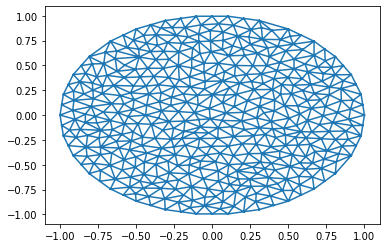

In [39]:
max_square = 6e-3

plot_mesh(round_points(1, 1, 0, 0), max_square)

## Шаг 2. Составьте матрицу жесткости
* Напишите функцию, которая составляет $3\times 3$ матрицу $M$ для заданного треугольника
$$M = \frac{|T|}{2} G G^T,
\qquad\text{где}\qquad
G =
\left(
\begin{array}{ccc}
1 & 1 & 1 \\
x_1 & x_2 & x_3 \\
y_1 & y_2 & y_3
\end{array}
\right)^{-1}
\left(
\begin{array}{ccc}
0 & 0 \\
1 & 0 \\
0 & 1
\end{array}
\right),
$$
и |T| - площадь треугольника:
$$
2 |T| = \det \left(
\begin{array}{cc}
x _2 - x _1 & y _2 - y _1 \\
x _3 - x _1 & y _3 - y _1 \\
\end{array}
\right),
$$
(подробнее [лекция 4](http://nbviewer.ipython.org/github/oseledets/fastpde/blob/master/lecture-4.ipynb)).
* В цикле по всем треугольникам соберите матрицу жеcткости.
<!---
```
for all T
    calculate M
    for k=1..3
        for l=1..3
            A[triangles[k], triangles[l]] += M[k, l]
```
-->

* Поправьте строки и столбцы, соответствующие условию Дирихле

**Примечание:** используйте $\verb|scipy.sparse|$ для работы с разреженными матрицами. Обратите внимание, что lil - это единственный формат $\verb|scipy.sparse|$ который позволяет менять элементы разреженной матрицы после создания.

In [6]:
def points_for_triangle(points, triangle, axis):
    return list(map(lambda i: points[i, axis], triangle))

#### Calculating M

In [7]:
def calculate_M(xs, ys):
    A = np.array([
        [1, 1, 1],
        xs[:],
        ys[:],
    ])
    B = np.array([
        [0, 0],
        [1, 0],
        [0, 1],
    ])
    
    G = np.linalg.inv(A) @ B
    
    return np.linalg.det(A) / 2 * G @ G.T

#### Calculating Stiffness Matrix

In [8]:
def assembling_SM(points, tris, facets):
    A = sps.lil_matrix((len(points), len(points)))
    for triangle in tris:
        M = calculate_M(
            points_for_triangle(points, triangle, 0),
            points_for_triangle(points, triangle, 1)
        )
        for k, p1 in enumerate(triangle):
            for l, p2 in enumerate(triangle):
                A[p1, p2] += M[k, l]
                
    for p, _ in facets:
        A[:, p] = 0
        A[p, :] = 0
        A[p, p] = 1
    
    return A.tocsc()

#### Test Stiffness Matrix

In [9]:
points, tris, facets = read_dat('mesh1.dat')

A = assembling_SM(points, tris, facets)
A.shape

(435, 435)

## Шаг 3. Создайте правую часть уравнения

Правая часть уравнения для $i$-го узла сети: $$f_i = \int_\Omega f \eta_i d\Omega .$$
Чтобы собрать правую часть пройдите все узлы в цикле и посчитайте $$ \int_T f \eta_i.$$ Можно использовать апроксимацию $$ \int_T f \eta_i \approx f(x_S, y_S) \int_\Omega \eta_i, $$ где $(x_S,y_S)$ обозначает центр масс треугольника. Подробнее см. [лекцию 4](http://nbviewer.ipython.org/github/oseledets/fastpde/blob/master/lecture-4.ipynb). 

**Примечание:** не забудьте обнулить правую часть для узлов соответствующих условию Дирихле.

#### Area function

In [10]:
def calculate_area(x, y):
    matrix = np.array([
        [x[1] - x[0], y[1] - y[0]],
        [x[2] - x[0], y[2] - y[0]]
    ])
    return np.linalg.det(matrix) / 2

#### Calculate Right hand side

In [11]:
def assembling_forces(points, tris, facets, f=1):
    b = np.zeros(len(points))
    for triangle in tris:
        S = calculate_area(
            points_for_triangle(points, triangle, 0),
            points_for_triangle(points, triangle, 1),
        )
        for p in triangle:
            b[p] += 1/3 * S * 1
    
    for p, _ in facets:
        b[p] = 0
    
    return b

## Шаг 4. Проверьте свой код
Проверьте, что свое решения, зная, что на области $\Omega = B_1(0,0)$ решение уравнения
$$
\begin{align*}
-\Delta u &= 1\qquad\text{on $\Omega$}
\\
u &= 0\qquad\text{on $\Gamma$}
\end{align*}
$$
имеет вид 
$$
u = \frac{1-x^2 - y^2}{4}
$$
**Примечание:** Проилюстрировать решение можно используя следующий код
```
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
xi = np.linspace(-1, 1, 200) 
yi = np.linspace(-1, 1, 200) 
z = mlab.griddata(points[:, 0], points[:, 1], sol, xi, yi)
plt.contourf(xi, yi, z)
plt.colorbar()
```

#### Answer plotting

In [50]:
def plot_result(points, values):
    xi = np.linspace(-1, 1, 200) 
    yi = np.linspace(-1, 1, 200) 
    X, Y = np.meshgrid(xi, yi)
    z = griddata(points, values, (X, Y), method='linear')
    plt.contourf(X, Y, z)
    plt.colorbar()
    plt.show()

#### Checking

In [51]:
def solve_mde(filename):
    points, tris, facets = read_dat(filename)

    A = assembling_SM(points, tris, facets)
    B = assembling_forces(points, tris, facets, 1)

    return points, spsolve(A, B)

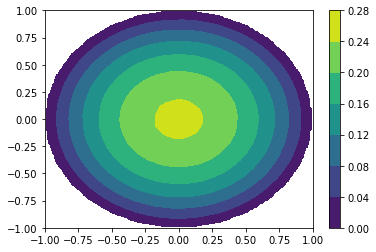

In [52]:
points, sol = solve_mde('mesh1.dat')

plot_result(points, sol)

In [53]:
u = lambda x, y: (1 - x**2 - y**2) / 4

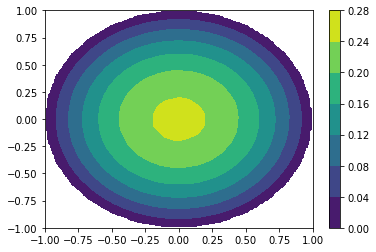

In [54]:
plot_result(points, u(points[:,0], points[:, 1]))

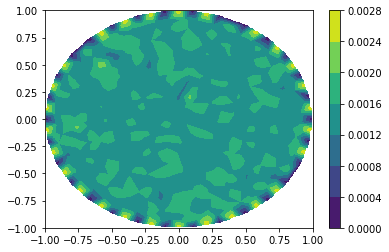

In [58]:
plot_result(points, np.abs(sol - np.array(u(points[:,0], points[:, 1]))))

## Шаг 5. Решите задачу для заданного региона.
Рассмотрите регионы $\Omega_1 = B_1(0,0)\setminus B_{0.3}(0.7-2\epsilon,0)$ и $\Omega_2 = B_1(0,0)\setminus B_{0.3}(0.7-\epsilon,0)$ и покажите что полученные решения (или интегралы решений) близки друг к другу для малых $\epsilon$.

In [17]:
eps = 0.001

#### Solve task with $2 \cdot eps$

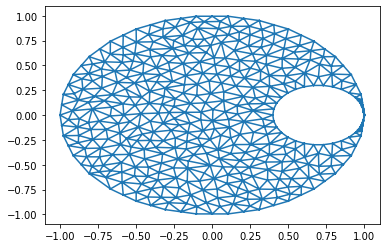

In [40]:
inner_points = round_points(0.3, 0.3, 0.7 - 2 * eps, 0)
outer_points = round_points(1, 1, 0, 0)

facets = round_trip_connect(0, len(inner_points)) 
facets.extend(round_trip_connect(len(facets), len(facets) + len(outer_points) - 1))

points = inner_points + outer_points

plot_mesh(points, max_square, holes=[(0.7 - 2 * eps, 0)], filename='task5_1.dat')

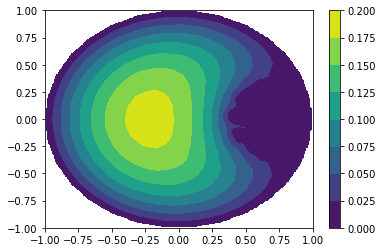

In [19]:
points, sol = solve_mde('task5_1.dat')

plot_result(points, sol)

#### Solve task with $eps$

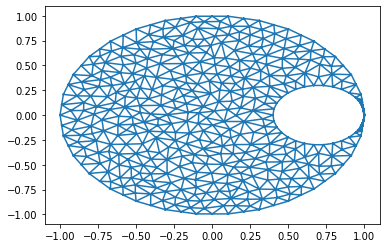

In [41]:
inner_points = round_points(0.3, 0.3, 0.7 - eps, 0)
outer_points = round_points(1, 1, 0, 0)

facets = round_trip_connect(0, len(inner_points)) 
facets.extend(round_trip_connect(len(facets), len(facets) + len(outer_points) - 1))

points = inner_points + outer_points

plot_mesh(points, max_square, holes=[(0.7 - eps, 0)], filename='task5_2.dat')

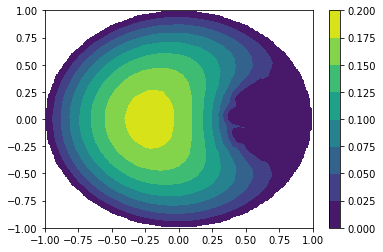

In [33]:
points, sol = solve_mde('task5_2.dat')

plot_result(points, sol)

## Шаг 6. Посчитайте поток жидкости
* Посчитайте поток жидкости для области $\int_{\Omega} u\, d \Omega$ in $B_1(0,0)\setminus B_{0.3}(0.7,0)$ и $B_1(0,0)\setminus B_{0.3}(0.5,0)$. Какой из них больше?

**Примечание:** $\int_{\Omega} u\, d \Omega$ не просто сумма всех элементов вектора решения, так как $u(x,y) \approx \sum с_i \eta_i(x,y)$.

In [26]:
def calculate_fluid_flow(filename, sol):
    points, tris, _ = read_dat(filename)
    
    ans = 0
    
    for triangle in tris:
        S = calculate_area(
            points_for_triangle(points, triangle, 0),
            points_for_triangle(points, triangle, 1),
        )
        for p in triangle:
            ans += 1/3 * S * sol[p]
            
    return ans

#### Create first

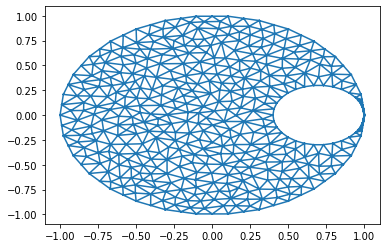

In [48]:
inner_points = round_points(0.3, 0.3, 0.7 - eps, 0)
outer_points = round_points(1, 1, 0, 0)

facets = round_trip_connect(0, len(inner_points) - 1) 
facets.extend(round_trip_connect(len(facets), len(facets) + len(outer_points) - 1))

points = inner_points + outer_points

plot_mesh(points, max_square, facets=facets, holes=[(0.7, 0)], filename='task6_1.dat')

#### Solve first

In [49]:
_, sol = solve_mde('task6_1.dat')

calculate_fluid_flow('task6_1.dat', sol)

0.24632873528096694

#### Create second

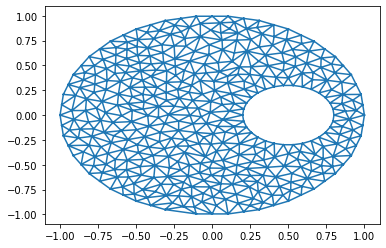

In [45]:
inner_points = round_points(0.3, 0.3, 0.5, 0)
outer_points = round_points(1, 1, 0, 0)

facets = round_trip_connect(0, len(inner_points) - 1) 
facets.extend(round_trip_connect(len(facets), len(facets) + len(outer_points) - 1))

points = inner_points + outer_points

plot_mesh(points, max_square, facets=facets, holes=[(0.5, 0)], filename='task6_2.dat')

#### Solve second

In [46]:
_, sol = solve_mde('task6_2.dat')

calculate_fluid_flow('task6_2.dat', sol)

0.1883708724375165

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()